In [1]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import pandas as pd
import numpy as np
import matplotlib.ticker as ticker
from sklearn import preprocessing
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
%matplotlib inline

In [2]:
!wget -O loan_train.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_train.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [3]:
df = pd.read_csv('loan_train.csv')
pd.set_option('display.max_rows', None)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,High School or Below,male
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,Bechalor,female
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,college,male
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,college,female
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,college,male


In [4]:
print(df.shape)
print()
print(df.dtypes)

(346, 10)

Unnamed: 0         int64
Unnamed: 0.1       int64
loan_status       object
Principal          int64
terms              int64
effective_date    object
due_date          object
age                int64
education         object
Gender            object
dtype: object


# Data Visualization:

In [5]:
df['loan_status'].value_counts()

PAIDOFF       260
COLLECTION     86
Name: loan_status, dtype: int64

In [6]:
df['Gender'].value_counts()

male      294
female     52
Name: Gender, dtype: int64

In [7]:
df['education'].value_counts()

High School or Below    151
college                 149
Bechalor                 44
Master or Above           2
Name: education, dtype: int64

In [8]:
df['age'].value_counts()

26    29
29    27
30    27
27    25
28    24
35    20
34    20
31    19
33    17
25    16
24    14
32    14
37    11
38     9
36     9
40     8
39     8
23     8
22     7
21     5
44     4
45     4
42     3
50     3
20     3
43     3
46     2
19     2
41     2
51     1
47     1
18     1
Name: age, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206DBFEBD88>]],
      dtype=object)

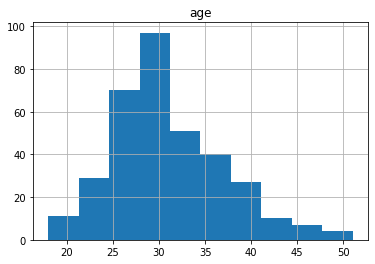

In [9]:
df.hist(column='age', bins=10)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000206DC375888>]],
      dtype=object)

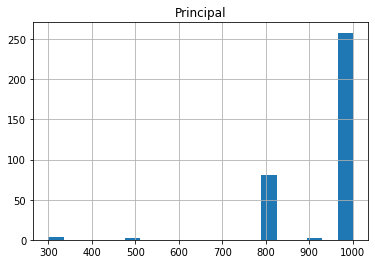

In [10]:
df.hist(column='Principal', bins=20)

# Some features in this dataset are categorical such as Gender or education. Sklearn Decision Trees do not handle categorical variables. So we will convert these features to numerical values:

In [11]:
df['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df['education'].replace(to_replace=['Bechalor', 'college', 'High School or Below', 'Master or Above'], value=[0,1,2,3],inplace=True)
df.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,0,0,PAIDOFF,1000,30,9/8/2016,10/7/2016,45,2,0
1,2,2,PAIDOFF,1000,30,9/8/2016,10/7/2016,33,0,1
2,3,3,PAIDOFF,1000,15,9/8/2016,9/22/2016,27,1,0
3,4,4,PAIDOFF,1000,30,9/9/2016,10/8/2016,28,1,1
4,6,6,PAIDOFF,1000,30,9/9/2016,10/8/2016,29,1,0


In [12]:
df['Gender'].value_counts()
#['male','female'], value=[0,1]

0    294
1     52
Name: Gender, dtype: int64

In [13]:
df['education'].value_counts()
#'Bechalor', 'college', 'High School or Below', 'Master or Above'], value=[0,1,2,3]

2    151
1    149
0     44
3      2
Name: education, dtype: int64

In [14]:
df.groupby(['education'])['loan_status'].value_counts(normalize=True)
#['male','female'], value=[0,1]
#'Bechalor', 'college', 'High School or Below', 'Master or Above'], value=[0,1,2,3]

education  loan_status
0          PAIDOFF        0.750000
           COLLECTION     0.250000
1          PAIDOFF        0.765101
           COLLECTION     0.234899
2          PAIDOFF        0.741722
           COLLECTION     0.258278
3          COLLECTION     0.500000
           PAIDOFF        0.500000
Name: loan_status, dtype: float64

In [15]:
df.groupby(['education'])['loan_status'].value_counts()
#'Bechalor', 'college', 'High School or Below', 'Master or Above'], value=[0,1,2,3]

education  loan_status
0          PAIDOFF         33
           COLLECTION      11
1          PAIDOFF        114
           COLLECTION      35
2          PAIDOFF        112
           COLLECTION      39
3          COLLECTION       1
           PAIDOFF          1
Name: loan_status, dtype: int64

In [16]:
df.groupby(['Gender'])['loan_status'].value_counts(normalize=True)
#['male','female'], value=[0,1]

Gender  loan_status
0       PAIDOFF        0.731293
        COLLECTION     0.268707
1       PAIDOFF        0.865385
        COLLECTION     0.134615
Name: loan_status, dtype: float64

In [17]:
df.groupby(['Gender'])['loan_status'].value_counts()
#['male','female'], value=[0,1]

Gender  loan_status
0       PAIDOFF        215
        COLLECTION      79
1       PAIDOFF         45
        COLLECTION       7
Name: loan_status, dtype: int64

# To use scikit-learn library, we have to convert the Pandas data frame to a Numpy array:

In [18]:
# picking up the right columns for mofeling:
X_KNN = df[['Principal','terms','age', 'education','Gender']]
X_DT = df[['Principal','terms','age', 'education','Gender']]
X_SVM = df[['Principal','terms','age', 'education','Gender']]
X_LR = df[['Principal','terms','age', 'education','Gender']]
X_KNN[0:5]
#'Bechalor', 'college', 'High School or Below', 'Master or Above'], value=[0,1,2,3]
#['male','female'], value=[0,1]

,Principal,terms,age,education,Gender
0,1000,30,45,2,0
1,1000,30,33,0,1
2,1000,15,27,1,0
3,1000,30,28,1,1
4,1000,30,29,1,0


# Normalizing the data:

In [19]:
#Normalize Data
X_KNN_Normalized = preprocessing.StandardScaler().fit(X_KNN).transform(X_KNN)
X_DT_Normalized = preprocessing.StandardScaler().fit(X_DT).transform(X_DT)
X_SVM_Normalized = preprocessing.StandardScaler().fit(X_SVM).transform(X_SVM)
X_LR_Normalized = preprocessing.StandardScaler().fit(X_LR).transform(X_LR)
X_KNN_Normalized[0:5]

array([[ 0.51578458,  0.92071769,  2.33152555,  0.97648333, -0.42056004],
       [ 0.51578458,  0.92071769,  0.34170148, -1.89894843,  2.37778177],
       [ 0.51578458, -0.95911111, -0.65321055, -0.46123255, -0.42056004],
       [ 0.51578458,  0.92071769, -0.48739188, -0.46123255,  2.37778177],
       [ 0.51578458,  0.92071769, -0.3215732 , -0.46123255, -0.42056004]])

# Loading Labels:

In [20]:
y = df['loan_status'].values
y[0:5]

array(['PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF', 'PAIDOFF'],
      dtype=object)

# KNN Model:

In [21]:
#KNN Model
# Train/Test Dataset
from sklearn.model_selection import train_test_split
#Modeling with normalized data:
X_train_kNN, X_test_kNN, y_train_kNN, y_test_kNN = train_test_split( X_KNN_Normalized, y, test_size=0.2, random_state=4)
#Modeling without normalized data:
#X_train_kNN, X_test_kNN, y_train_kNN, y_test_kNN = train_test_split( X_KNN, y, test_size=0.2, random_state=4)

In [22]:
print('Shape of X training set is: {}'.format(X_train_kNN.shape),'&',' Size of Y training set is: {}'.format(y_train_kNN.shape))
print('Shape of X test set is: {}'.format(X_test_kNN.shape),'&',' Size of Y test set is: {}'.format(y_test_kNN.shape))

Shape of X training set is: (276, 5) &  Size of Y training set is: (276,)
Shape of X test set is: (70, 5) &  Size of Y test set is: (70,)


In [23]:
Ks = 40
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train_kNN,y_train_kNN)
    y_predicted_KNN=neigh.predict(X_test_kNN)
    mean_acc[n-1] = metrics.accuracy_score(y_test_kNN, y_predicted_KNN)  
    std_acc[n-1]=np.std(y_predicted_KNN==y_test_kNN)/np.sqrt(y_predicted_KNN.shape[0])
mean_acc

array([0.64285714, 0.54285714, 0.68571429, 0.65714286, 0.77142857,
       0.74285714, 0.74285714, 0.7       , 0.74285714, 0.72857143,
       0.77142857, 0.74285714, 0.8       , 0.8       , 0.8       ,
       0.78571429, 0.78571429, 0.78571429, 0.78571429, 0.77142857,
       0.78571429, 0.78571429, 0.78571429, 0.78571429, 0.78571429,
       0.78571429, 0.78571429, 0.78571429, 0.78571429, 0.78571429,
       0.78571429, 0.78571429, 0.78571429, 0.78571429, 0.78571429,
       0.78571429, 0.78571429, 0.78571429, 0.78571429])

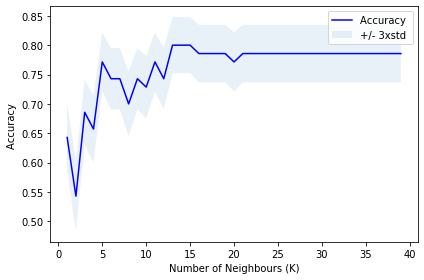

In [24]:
plt.plot(range(1,Ks),mean_acc,'b')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbours (K)')
plt.tight_layout()
plt.show()

In [25]:
# Accuracy
print("Highest accuracy achieved =", mean_acc.max(),"with k =", mean_acc.argmax()+1)

Highest accuracy achieved = 0.8 with k = 13


In [26]:

neigh = KNeighborsClassifier(n_neighbors = mean_acc.argmax()+1).fit(X_train_kNN,y_train_kNN)
y_predicted_KNN=neigh.predict(X_test_kNN)
accuracy_KNN = metrics.accuracy_score(y_test_kNN, y_predicted_KNN) 
print('accuracy_KNN: ', accuracy_KNN)
f1_kNN_test_data = f1_score(y_test_kNN, y_predicted_KNN, pos_label='PAIDOFF')
print('f1_kNN_test_data: ', f1_kNN_test_data)
jaccard_kNN_test_data = jaccard_similarity_score(y_test_kNN, y_predicted_KNN)
print('jaccard_kNN_test_data: ', jaccard_kNN_test_data)

accuracy_KNN:  0.8
f1_kNN_test_data:  0.8870967741935484
jaccard_kNN_test_data:  0.8


C:\Users\nafisseh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Decision Tree Model:

In [27]:
# Train/Test dataset
from sklearn.model_selection import train_test_split
#Modeling with normalized data:
X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_DT_Normalized, y, test_size=0.2, random_state=4)
#Modleing #Modleing without normalized data:
#X_train_DT, X_test_DT, y_train_DT, y_test_DT = train_test_split(X_DT, y, test_size=0.2, random_state=4)


In [28]:
# Fit and predict
from sklearn.tree import DecisionTreeClassifier
#loan_tree = DecisionTreeClassifier(criterion="entropy").fit(X_train_DT, y_train_DT)
loan_tree = DecisionTreeClassifier(criterion="entropy", max_depth = 8).fit(X_train_DT, y_train_DT)
y_predicted_DT = loan_tree.predict(X_test_DT)

In [29]:
# Check accuracy
from sklearn import metrics
accuracy_DT = metrics.accuracy_score(y_test_DT, y_predicted_DT)
print('accuracy_DT: ', accuracy_DT)
f1_DT_test_data = f1_score(y_test_DT, y_predicted_DT, pos_label='PAIDOFF')
print('f1_DT_test_data: ', f1_DT_test_data)
jaccard_DT_test_data = jaccard_similarity_score(y_test_DT, y_predicted_DT)
print('jaccard_DT_test_data: ', jaccard_DT_test_data)

accuracy_DT:  0.7714285714285715
f1_DT_test_data:  0.8688524590163933
jaccard_DT_test_data:  0.7714285714285715


C:\Users\nafisseh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Plotting the Decision Tree:

In [30]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline 

C:\Users\nafisseh\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


In [31]:
Feature = df[['Principal','terms','age', 'education','Gender']]
Feature.head()
#'Bechalor', 'college', 'High School or Below', 'Master or Above'], value=[0,1,2,3]
#['male','female'], value=[0,1]

,Principal,terms,age,education,Gender
0,1000,30,45,2,0
1,1000,30,33,0,1
2,1000,15,27,1,0
3,1000,30,28,1,1
4,1000,30,29,1,0


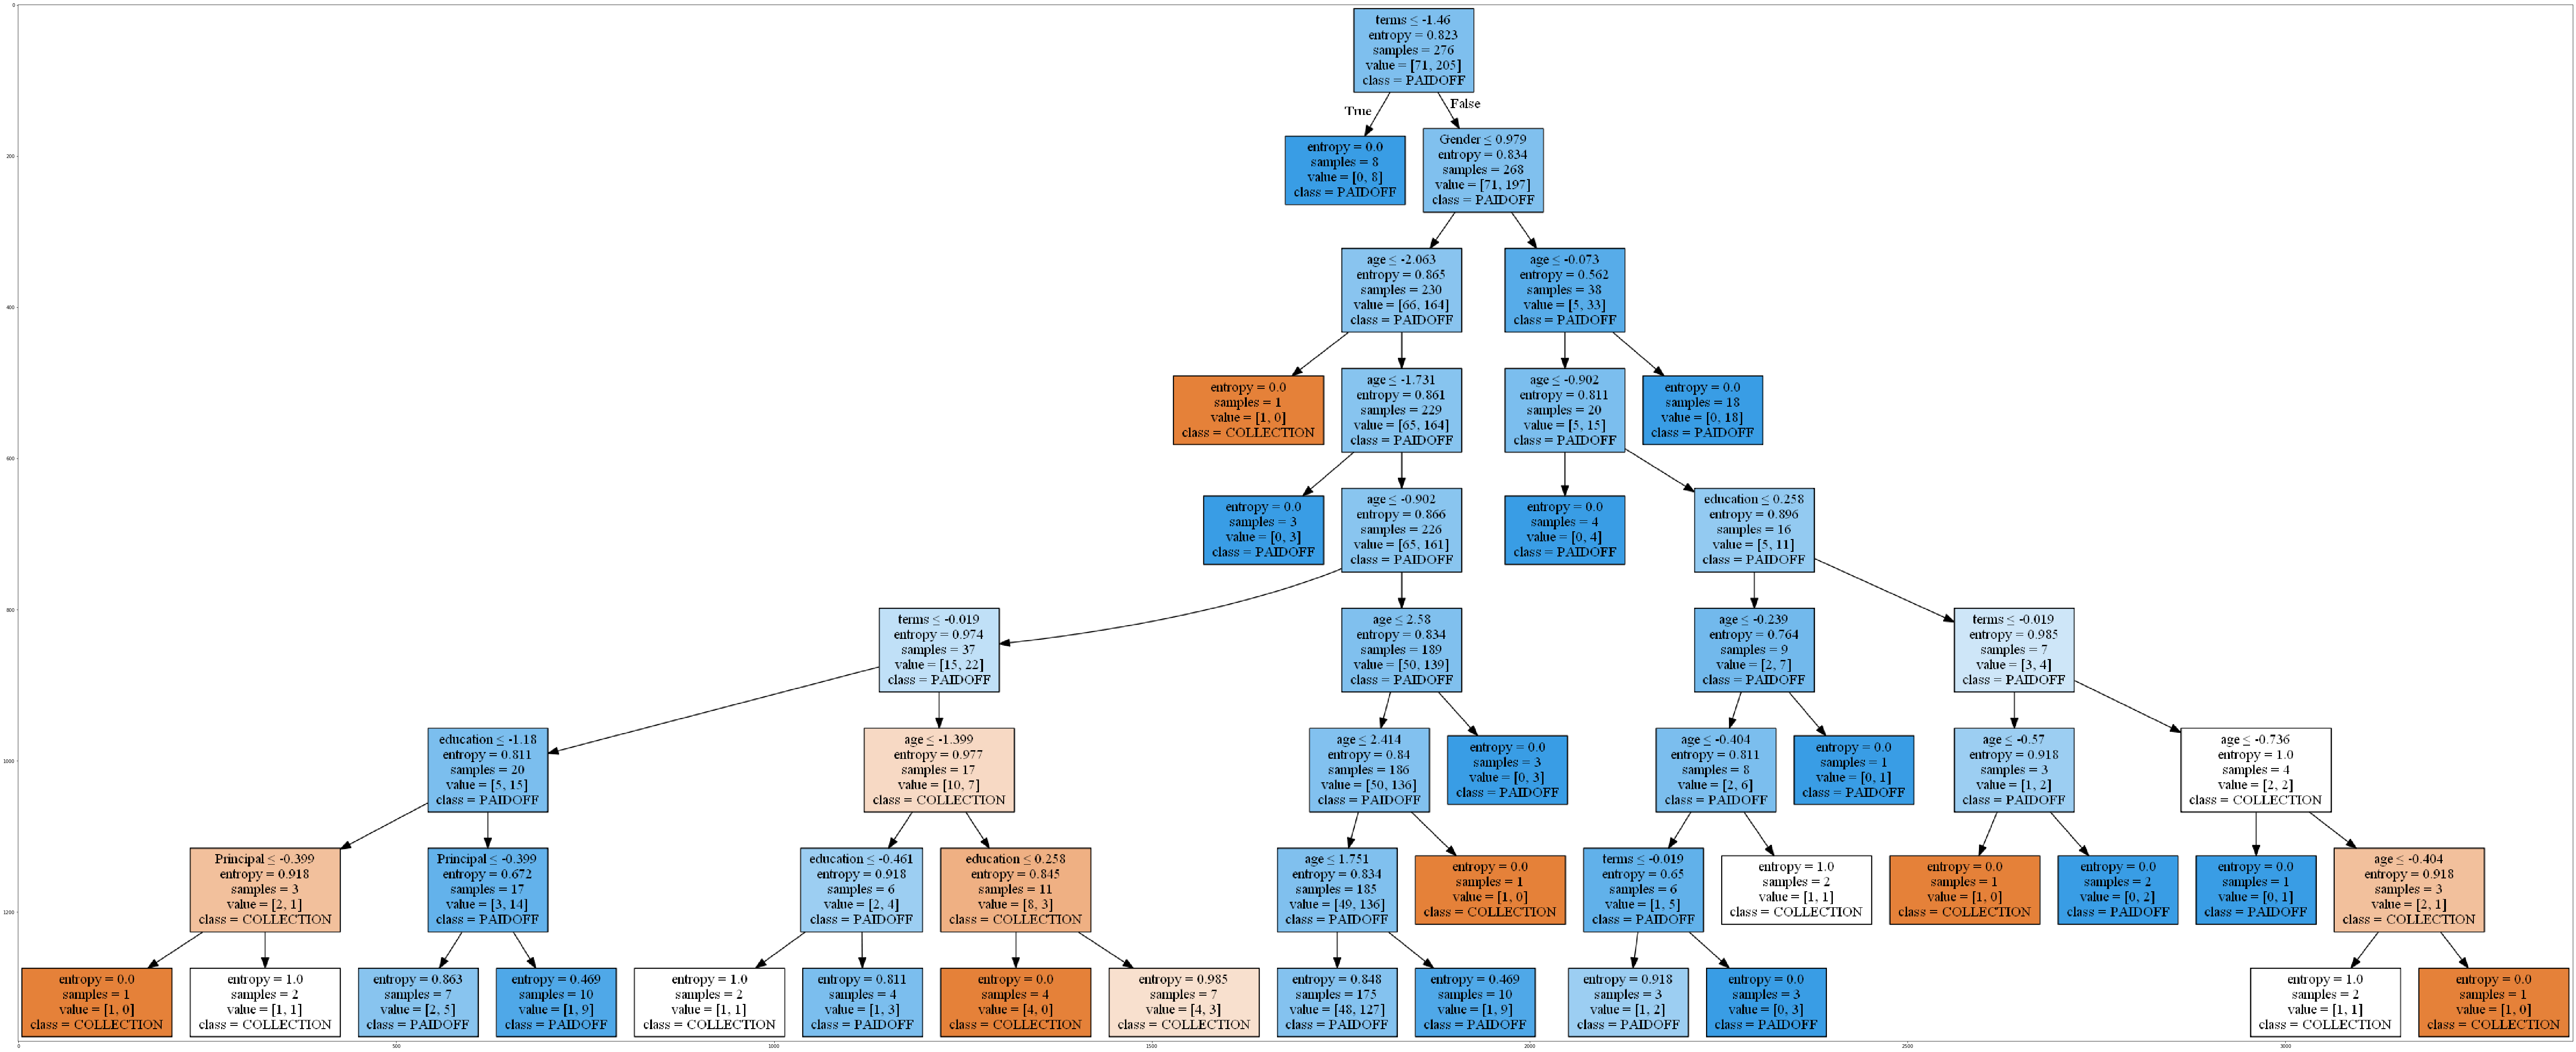

In [32]:
dot_data = StringIO()
my_data =df
filename = "loantree.png"
featureNames = Feature.columns[0:5]
targetNames = my_data["loan_status"].unique().tolist()
out=tree.export_graphviz(loan_tree,feature_names=featureNames, out_file=dot_data, class_names= np.unique(y_train_DT), filled=True,  special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(100, 200))
plt.imshow(img,interpolation='nearest')

# Support Vector Machine:

In [33]:
#Support Vector Machine
# Train/Test dataset
from sklearn.model_selection import train_test_split
#Modeling with normalized data:
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_SVM_Normalized, y, test_size=0.2, random_state=4)
#Modeling without normalized data:
#X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_SVM, y, test_size=0.2, random_state=4)

In [34]:
# Fit and predict
from sklearn import svm
model_SVM = svm.SVC(kernel='rbf')
model_SVM.fit(X_train_SVM, y_train_SVM)
y_predicted_SVM = model_SVM.predict(X_test_SVM)

#kernel functions:1.Linear 2.Polynomial 3.Radial basis function (RBF) 4.Sigmoid. Let's use the default, RBF 

C:\Users\nafisseh\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [35]:
# Check accuracy
from sklearn import metrics
accuracy_SVM = metrics.accuracy_score(y_test_SVM, y_predicted_SVM)
print('accuracy_SVM: ', accuracy_SVM)
f1_SVM_test_data = f1_score(y_test_SVM, y_predicted_SVM, pos_label='PAIDOFF')
print('f1_SVM_test_data: ', f1_SVM_test_data)
jaccard_SVM_test_data = jaccard_similarity_score(y_test_SVM, y_predicted_SVM)
print('jaccard_SVM_test_data: ', jaccard_SVM_test_data)

accuracy_SVM:  0.7857142857142857
f1_SVM_test_data:  0.88
jaccard_SVM_test_data:  0.7857142857142857


C:\Users\nafisseh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


# Logistic Regression:

In [36]:
#Logistic Regression
# Train/Test dataset
from sklearn.model_selection import train_test_split
#Modeling with normalized data:
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR_Normalized, y, test_size=0.15, random_state=4)
#Modeling withou normalized data:
#X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_LR, y, test_size=0.2, random_state=4)

In [37]:
# Fit and Predict
from sklearn.linear_model import LogisticRegression
modlel_LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train_LR, y_train_LR)
y_predicted_LR = modlel_LR.predict(X_test_LR)
# some of solvers: ‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’

In [38]:
# Accuracy
accuracy_LR = metrics.accuracy_score(y_test_LR, y_predicted_LR)
print('accuracy_LR: ', accuracy_LR)
f1_LR_test_data = f1_score(y_test_LR, y_predicted_LR, pos_label='PAIDOFF')
print('f1_LR_test_data: ', f1_LR_test_data)
jaccard_LR_test_data = jaccard_similarity_score(y_test_LR, y_predicted_LR)
print('jaccard_LR_test_data: ', jaccard_LR_test_data)

logloss_LR_test_data = log_loss(y_test_LR, modlel_LR.predict_proba(X_test_LR))
print('logloss_LR: ', logloss_LR_test_data)

accuracy_LR:  0.8076923076923077
f1_LR_test_data:  0.8936170212765957
jaccard_LR_test_data:  0.8076923076923077
logloss_LR:  0.5834570867444262


C:\Users\nafisseh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)


In [39]:
Jaccard = pd.Series({'KNN':jaccard_kNN_test_data, 'Decision Tree':jaccard_DT_test_data, 'SVM':jaccard_SVM_test_data, 'LogisticRegression':jaccard_LR_test_data})
F1_score = pd.Series({'KNN':f1_kNN_test_data, 'Decision Tree':f1_DT_test_data, 'SVM':f1_SVM_test_data, 'LogisticRegression':f1_LR_test_data})
LogLoss = pd.Series({'KNN':'NA', 'Decision Tree':'NA', 'SVM':'NA','LogisticRegression': logloss_LR_test_data})
summary = pd.DataFrame({'Jaccard':Jaccard, 'F1-score':F1_score, 'LogLoss': LogLoss})
summary.index.name = 'Algorithm'
summary

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.800000,0.887097,NA
Decision Tree,0.771429,0.868852,NA
SVM,0.785714,0.880000,NA
LogisticRegression,0.807692,0.893617,0.583457


# Model Evaluation:

In [40]:
!wget -O loan_test.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/loan_test.csv

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [41]:
df_test = pd.read_csv('loan_test.csv')
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,Bechalor,female
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,Master or Above,male
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,High School or Below,female
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,college,male
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,Bechalor,male


In [42]:
y_testset = df_test['loan_status'].values
print(y[0:5])

['PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF' 'PAIDOFF']


In [43]:
df_test['Gender'].replace(to_replace=['male','female'], value=[0,1],inplace=True)
df_test['education'].replace(to_replace=['Bechalor', 'college', 'High School or Below', 'Master or Above'], value=[0,1,2,3],inplace=True)
df_test.head()

,Unnamed: 0,Unnamed: 0.1,loan_status,Principal,terms,effective_date,due_date,age,education,Gender
0,1,1,PAIDOFF,1000,30,9/8/2016,10/7/2016,50,0,1
1,5,5,PAIDOFF,300,7,9/9/2016,9/15/2016,35,3,0
2,21,21,PAIDOFF,1000,30,9/10/2016,10/9/2016,43,2,1
3,24,24,PAIDOFF,1000,30,9/10/2016,10/9/2016,26,1,0
4,35,35,PAIDOFF,800,15,9/11/2016,9/25/2016,29,0,0


In [44]:
#PICKING UP THE RIGHT COLUMNS:
X_testset_KNN = df_test[['Principal','terms','age', 'education','Gender']]
X_testset_DT = df_test[['Principal','terms','age', 'education','Gender']]
X_testset_SVM = df_test[['Principal','terms','age', 'education','Gender']]
X_testset_LR = df_test[['Principal','terms','age', 'education','Gender']]
X_testset_KNN[0:5]
#['Bechalor', 'college', 'High School or Below', 'Master or Above'], value=[0,1,2,3]
#['male','female'], value=[0,1]

,Principal,terms,age,education,Gender
0,1000,30,50,0,1
1,300,7,35,3,0
2,1000,30,43,2,1
3,1000,30,26,1,0
4,800,15,29,0,0


In [45]:
# normalize test X set 
X_testset_KNN_Normalized = preprocessing.StandardScaler().fit(X_testset_KNN).transform(X_testset_KNN)
X_testset_DT_Normalized = preprocessing.StandardScaler().fit(X_testset_DT).transform(X_testset_DT)
X_testset_SVM_Normalized = preprocessing.StandardScaler().fit(X_testset_SVM).transform(X_testset_SVM)
X_testset_LR_Normalized = preprocessing.StandardScaler().fit(X_testset_LR).transform(X_testset_LR)
X_testset_KNN_Normalized[0:5]                                                                  

array([[ 0.49362588,  0.92844966,  3.05981865, -1.71746271,  1.97714211],
       [-3.56269116, -1.70427745,  0.53336288,  2.20125503, -0.50578054],
       [ 0.49362588,  0.92844966,  1.88080596,  0.89501578,  1.97714211],
       [ 0.49362588,  0.92844966, -0.98251057, -0.41122347, -0.50578054],
       [-0.66532184, -0.78854628, -0.47721942, -1.71746271, -0.50578054]])

In [46]:
# Jaccard and F1-Score
y_predicted_testset_KNN = neigh.predict(X_testset_KNN_Normalized)
jaccard_kNN = jaccard_similarity_score(y_testset, y_predicted_testset_KNN)

y_predicted_testset_DT = loan_tree.predict(X_testset_DT_Normalized)
jaccard_DT = jaccard_similarity_score(y_testset, y_predicted_testset_DT)

y_predicted_testset_SVM =model_SVM.predict(X_testset_SVM_Normalized)
jaccard_SVM = jaccard_similarity_score(y_testset, y_predicted_testset_SVM)

y_predicted_testset_LR = modlel_LR.predict(X_testset_LR_Normalized)
jaccard_LR = jaccard_similarity_score(y_testset,y_predicted_testset_LR)

print('jaccard_kNN: ', jaccard_kNN)
print('jaccard_DT: ', jaccard_DT)
print('jaccard_SVM: ', jaccard_SVM)
print('jaccard_LR: ', jaccard_LR)

f1_kNN = f1_score(y_testset, y_predicted_testset_KNN, pos_label='PAIDOFF')
f1_DT = f1_score(y_testset, y_predicted_testset_DT, pos_label = 'PAIDOFF')
f1_SVM = f1_score(y_testset, y_predicted_testset_SVM, pos_label = 'PAIDOFF')
f1_LR = f1_score(y_testset, y_predicted_testset_LR, pos_label = 'PAIDOFF')
print('f1_kNN: ', f1_kNN)
print('f1_DT: ', f1_DT)
print('f1_SVM: ', f1_SVM)
print('f1_LR: ', f1_LR)
# Log loss for Logisitic Regression:
logloss_LR = log_loss(y_testset, modlel_LR.predict_proba(X_testset_LR_Normalized))
print('logloss_LR: ', logloss_LR)

jaccard_kNN:  0.7407407407407407
jaccard_DT:  0.6851851851851852
jaccard_SVM:  0.7407407407407407
jaccard_LR:  0.7407407407407407
f1_kNN:  0.851063829787234
f1_DT:  0.8131868131868133
f1_SVM:  0.851063829787234
f1_LR:  0.851063829787234
logloss_LR:  0.6120085198725943


C:\Users\nafisseh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\nafisseh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  'and multiclass classification tasks.', DeprecationWarning)
C:\Users\nafisseh\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:635: DeprecationWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising 

In [47]:
Jaccard = pd.Series({'KNN':jaccard_kNN, 'Decision Tree':jaccard_DT, 'SVM':jaccard_SVM, 'LogisticRegression':jaccard_LR})
F1_score = pd.Series({'KNN':f1_kNN, 'Decision Tree':f1_DT, 'SVM':f1_SVM, 'LogisticRegression':f1_LR})
LogLoss = pd.Series({'KNN':'NA', 'Decision Tree':'NA', 'SVM':'NA','LogisticRegression': logloss_LR})
summary = pd.DataFrame({'Jaccard':Jaccard, 'F1-score':F1_score, 'LogLoss': LogLoss})
summary.index.name = 'Algorithm'
summary

,Jaccard,F1-score,LogLoss
Algorithm,,,
KNN,0.740741,0.851064,NA
Decision Tree,0.685185,0.813187,NA
SVM,0.740741,0.851064,NA
LogisticRegression,0.740741,0.851064,0.612009
